In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.autograd import Variable

import glob
import os
import matplotlib.pyplot as plt
import torchvision.models as models
import cv2
import pickle
import random

In [2]:
# class Extractor(nn.Module):
#     def __init__(self):
#         super(Extractor, self).__init__()
        
#         self.net = models.vgg16(pretrained=True)        
#         self.net.classifier = nn.Sequential(
#             *(self.net.classifier[i] for i in range(5)))
        
        
#     def forward(self, images): 
#         return self.net(images)

In [3]:
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_layers)
        self.fc2 = nn.Linear(hidden_layers, hidden_layers)
        self.fc3 = nn.Linear(hidden_layers, output_size)
    
    def forward(self,data):
        x = F.tanh(self.fc1(data))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x,dim = 1)

In [4]:
import pickle
with open("vgg19_data.pkl","rb") as f:
    temp = pickle.load(f)

In [5]:
temp

{'net': Classifier(
   (fc1): Linear(in_features=4096, out_features=2048, bias=True)
   (fc2): Linear(in_features=2048, out_features=2048, bias=True)
   (fc3): Linear(in_features=2048, out_features=101, bias=True)
 ),
 'records': {1: {'test': [0.33984158415841587,
    0.38304950495049506,
    0.39631683168316834,
    0.40320792079207923,
    0.40946534653465344,
    0.4125148514851485,
    0.4085148514851485,
    0.4145346534653465,
    0.417029702970297,
    0.41699009900990097,
    0.4211881188118812,
    0.4232871287128713,
    0.4265346534653465,
    0.42803960396039603,
    0.4312079207920792,
    0.43097029702970296,
    0.429980198019802,
    0.4311287128712871,
    0.430019801980198,
    0.4361980198019802,
    0.4352871287128713,
    0.43833663366336634,
    0.44134653465346535,
    0.4436831683168317,
    0.446970297029703,
    0.4453069306930693,
    0.44356435643564357,
    0.44823762376237625,
    0.44875247524752476,
    0.44994059405940595,
    0.4517623762376238,
    0.

In [6]:
records = temp["records"]

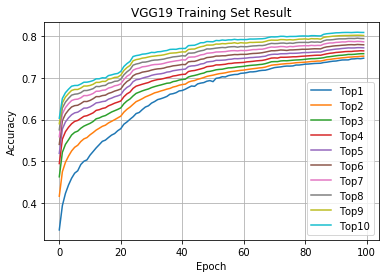

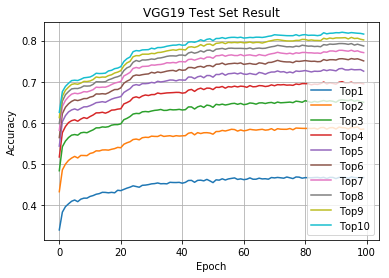

In [9]:
topn_list = [1,2,3,4,5,6,7,8,9,10]

legends = []
for topn in topn_list:
    plt.plot(records[topn]["train"])
    legends.append("Top%d"%topn)
    
#     plt.plot(records[topn]["test"])
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(legends)
plt.title("VGG19 Training Set Result")
plt.savefig("vgg19_training_topn.png")
plt.show()


legends = []
for topn in topn_list:
    plt.plot(records[topn]["test"])
    legends.append("Top%d"%topn)
    
#     plt.plot(records[topn]["test"])
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("VGG19 Test Set Result")
plt.legend(legends)
plt.savefig("vgg19_test_topn.png")
plt.show()